In [2]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Data Collection And Preprocessing.

titanic_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Checking the dataset consists of how many rows and columns.
titanic_data.shape

(891, 12)

In [6]:
# Checking the data info.
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Checking the column data types.
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Checking the null values in dataset.
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

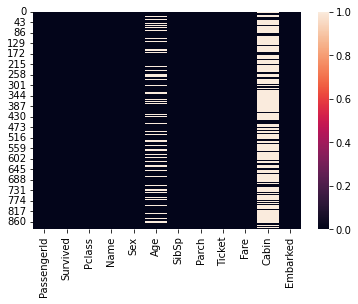

In [9]:
# Handling the missing values.

sns.heatmap(titanic_data.isna())

In [10]:
# Here we can clearly see the missing values in the above heatmap.
# Here we will use mean and mode imputation to handle missing values.

titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode,inplace=True)

In [11]:
# Again checking the missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
# We succesfully handle the 'Age column' and 'Embarked column' missinng values.

In [13]:
titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin'])*100

77.10437710437711

In [14]:
# Here 'Cabin column' has 77% missing values so we will drop this column from dataset
titanic_data.drop('Cabin',axis=1,inplace=True)

In [15]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [16]:
# We successfully dropped the cabin column.


# Checking statistical measures of the dataset.
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)
titanic_data['Gender']=gender

In [18]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


<AxesSubplot:xlabel='Survived', ylabel='count'>

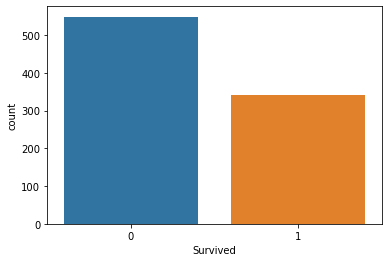

In [19]:
# Exploratory Data Analysis/Data Visualization.

sns.countplot(x='Survived',data=titanic_data) 

In [20]:
# The above countplot shows no. of survived men and women.

titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
# Total no. of survived male = 577
# Total no. of survived female = 314

<AxesSubplot:xlabel='Sex', ylabel='count'>

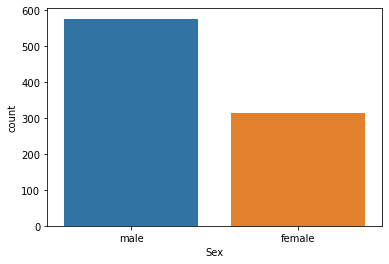

In [22]:
# Count plot for Sex column.
sns.countplot(x='Sex',data=titanic_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

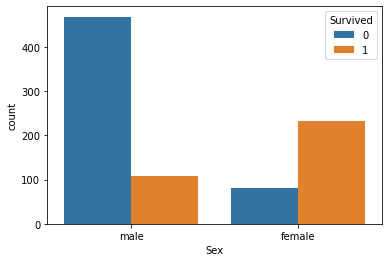

In [23]:
import warnings
warnings.filterwarnings('ignore')

# Number of survival reagarding gender/Sex column.
sns.countplot('Sex', hue='Survived',data=titanic_data)

In [24]:
# Here in the above countplot the no. of survived female is less than male.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

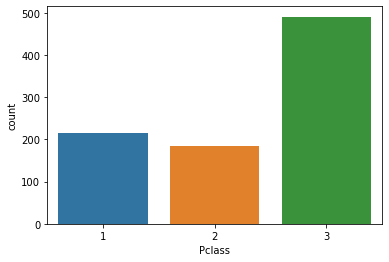

In [25]:
# Count plot for Pclass column.
sns.countplot(x='Pclass',data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

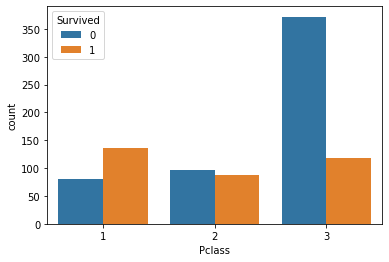

In [26]:
# In the Pclass column we have 3 categories, 1st class, 2ndclass, 3rd class.

# We will check Number of survival reagarding Pclass column.
sns.countplot('Pclass', hue='Survived',data=titanic_data)

In [27]:
# A/cc to above count plot survived no. of males are more in 3rd class column.
# And survived no. of females in 1st class cloumn are more as compared to others.

<AxesSubplot:xlabel='Age'>

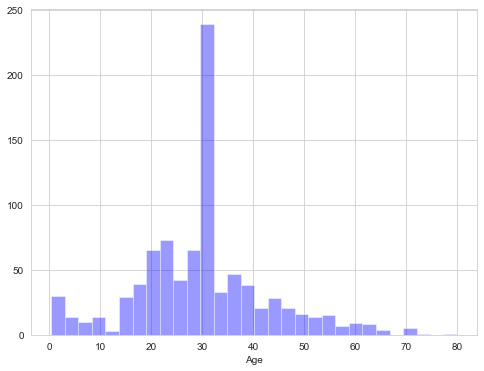

In [28]:
# hist plot for Age column.
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(titanic_data['Age'].dropna(), kde = False, color ='blue')

In [29]:
# This graph gives a summary of the age range of men, women who were saved. The survival rate is –  
# High for women in the age range 20-50.
# Less for men as the age increases.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

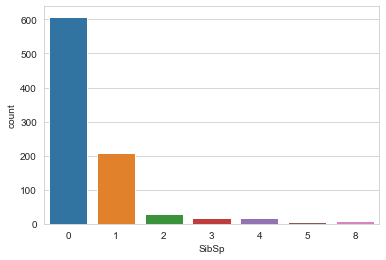

In [30]:
# Count plot for SibSp column.
sns.countplot(x='SibSp',data=titanic_data)

In [31]:
# Here in the above plot 0 denotes the no. of male passesngers travelling alone
# 1 denotes no. of female passengers travelling alone
# 2 denotes some passengers travelling with their spouse.
# 3 denotes passengers travelling with their siblings and so on.

<AxesSubplot:xlabel='Parch', ylabel='count'>

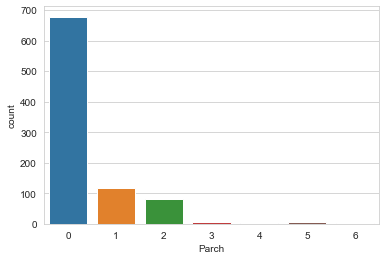

In [32]:
# Countplot for Parch column.
sns.countplot(x='Parch',data=titanic_data)

In [33]:
#  The above graph shows the number of parents / children aboard the Titanic Ticket.

<AxesSubplot:>

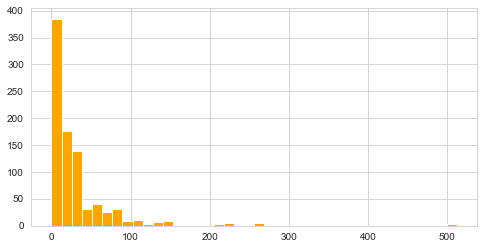

In [34]:
titanic_data['Fare'].hist(color='orange',bins=40,figsize=(8,4))

In [35]:
# Fare denotes the fare paid by a passenger.
# It can be concluded that if a passenger paid a higher fare, the survival rate is more.

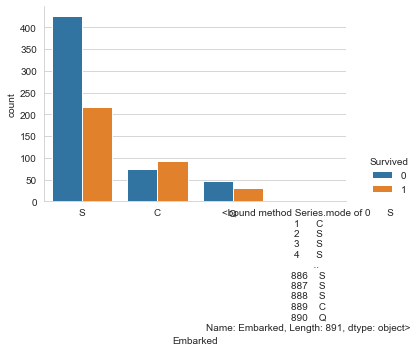

In [36]:
sns.catplot(x='Embarked',hue='Survived', kind='count', data=titanic_data)

In [37]:
# Majority of the passengers boarded from S consisting males and females.
# Majority of class 3 passengers boarded from Q.
# Conclusion
# The columns that can be dropped are: 
#PassengerId, Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome. 
#Age, Fare: Instead, the respective range columns are retained.

titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [38]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [39]:
# Now will check the correlation between columns.
titanic_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333
Gender,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000


<AxesSubplot:>

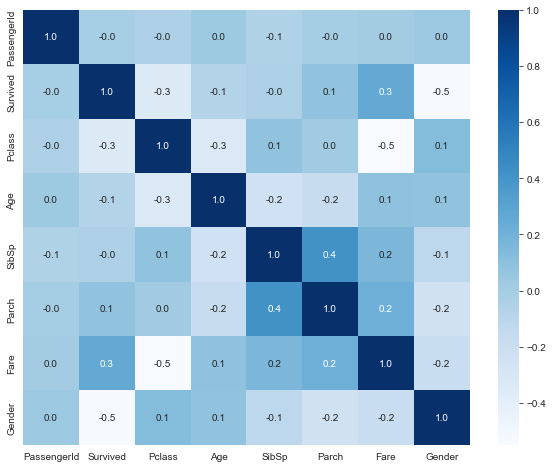

In [40]:
# We will visualize the above description with the help of heatmap.

plt.figure(figsize=(10,8))
sns.heatmap(titanic_data.corr(), annot=True, cbar=True, cmap='Blues', fmt='0.1f')

In [ ]:
# Here Negative values shows negative correlation while positive values shows positive correlation.

In [ ]:
# PREPROCESSING

In [41]:
# Let's Split the Independent and Target variables in x and y.

x=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [42]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


In [43]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [44]:
# Checking skewness
x.skew().sort_values(ascending=False)

Fare           4.787317
SibSp          3.695352
Parch          2.749117
Age            0.434488
PassengerId    0.000000
Gender        -0.618921
Pclass        -0.630548
dtype: float64

In [45]:
from sklearn.preprocessing import power_transform

In [47]:
titanic_x=power_transform(x)
titanic_x

array([[-2.14814111,  0.86397329, -0.55626693, ..., -0.56025296,
        -0.87882001,  0.73769513],
       [-2.13183003, -1.45912855,  0.65726854, ..., -0.56025296,
         1.33665056, -1.35557354],
       [-2.117043  ,  0.86397329, -0.24157742, ..., -0.56025296,
        -0.79006485, -1.35557354],
       ...,
       [ 1.55071925,  0.86397329,  0.04200106, ...,  1.84685634,
         0.28888536, -1.35557354],
       [ 1.55371741, -1.45912855, -0.24157742, ..., -0.56025296,
         0.52790578,  0.73769513],
       [ 1.5567146 ,  0.86397329,  0.21525442, ..., -0.56025296,
        -0.81234947,  0.73769513]])

In [48]:
# Here we sucessfully removed the skewness using power transformation.
pd.DataFrame(titanic_x,columns=x.columns).skew().sort_values(ascending=False)

Parch          1.228795
SibSp          0.808608
Age            0.064420
Fare          -0.040329
PassengerId   -0.283201
Pclass        -0.441438
Gender        -0.618921
dtype: float64

<AxesSubplot:>

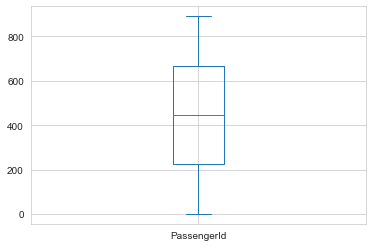

In [50]:
x['PassengerId'].plot.box()

In [ ]:
# Here in PassengerId column there are no outliers.

<AxesSubplot:>

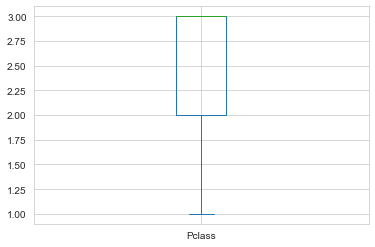

In [52]:
x['Pclass'].plot.box()

In [ ]:
# Here in the above boxplot the Pclass column has no outlier.

<AxesSubplot:>

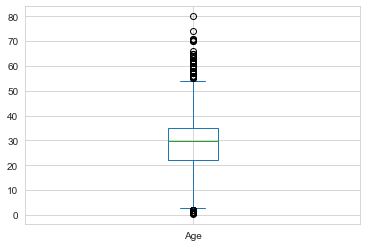

In [53]:
x['Age'].plot.box()

In [ ]:
# The above boxplot has some data points lying out of whishkers they may be called as outliers.

<AxesSubplot:>

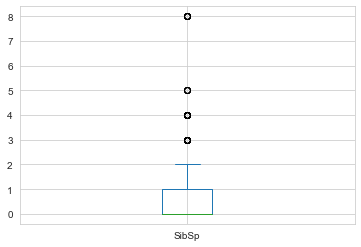

In [54]:
x['SibSp'].plot.box()

In [ ]:
# Here some data points are lying outside so they may be called as ouliers.

<AxesSubplot:>

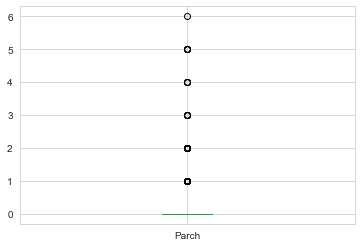

In [55]:
x['Parch'].plot.box()

In [ ]:
# Here some data points are lying outside so they may be called as ouliers.

<AxesSubplot:>

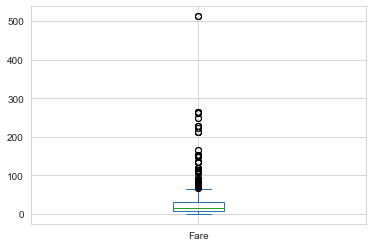

In [56]:
x['Fare'].plot.box()

In [ ]:
# Here one data point is too far so it is an outlier.

<AxesSubplot:>

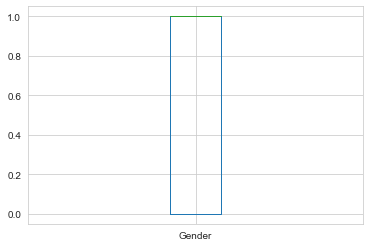

In [58]:
x['Gender'].plot.box()

In [59]:
# Gender column has no outliers.

# Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
        5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
        4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
        3, 3, 2, 4, 3, 4], dtype=int64))

In [63]:
train_data=x[(z<3).all(axis=1)]
train_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


In [64]:
train_data.shape

(820, 7)

In [62]:
x.shape

(891, 7)

In [71]:
# Model Building and Training.

# Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_lr)*100)

# Model Evaluation
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy: 78.64406779661017
[[160  19]
 [ 44  72]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.84       179
           1       0.79      0.62      0.70       116

    accuracy                           0.79       295
   macro avg       0.79      0.76      0.77       295
weighted avg       0.79      0.79      0.78       295



In [72]:
# Let's check the cross validation score.
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lr,x,y,cv=8)
print('Cross_validation_score for RandomForest is:',cvs.mean())


Cross_validation_score for RandomForest is: 0.781119288931789


In [73]:
cvs

array([0.74107143, 0.80357143, 0.82142857, 0.76576577, 0.75675676,
       0.76576577, 0.8018018 , 0.79279279])

In [74]:
# Random Forest Classifier.
max_accuracy=0
max_RS=0

for i in range(1,30):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=i)
    rf= RandomForestClassifier()
    rf.fit(x_train,y_train)
    x_test_pred=rf.predict(x_test)
    accu=accuracy_score(y_test, x_test_pred)
    print('Accuracy is:',accu, 'random_state', i)
    
    if accu>max_accuracy:
        max_accuracy=accu
        maxRS=i
        print('maximum_accuracy',max_accuracy,'maximum_random_state',i)

Accuracy is: 0.7988826815642458 random_state 1
maximum_accuracy 0.7988826815642458 maximum_random_state 1
Accuracy is: 0.7932960893854749 random_state 2
Accuracy is: 0.8156424581005587 random_state 3
maximum_accuracy 0.8156424581005587 maximum_random_state 3
Accuracy is: 0.8770949720670391 random_state 4
maximum_accuracy 0.8770949720670391 maximum_random_state 4
Accuracy is: 0.8324022346368715 random_state 5
Accuracy is: 0.8547486033519553 random_state 6
Accuracy is: 0.7932960893854749 random_state 7
Accuracy is: 0.8044692737430168 random_state 8
Accuracy is: 0.8044692737430168 random_state 9
Accuracy is: 0.8435754189944135 random_state 10
Accuracy is: 0.8324022346368715 random_state 11
Accuracy is: 0.7597765363128491 random_state 12
Accuracy is: 0.8379888268156425 random_state 13
Accuracy is: 0.8324022346368715 random_state 14
Accuracy is: 0.8324022346368715 random_state 15
Accuracy is: 0.8044692737430168 random_state 16
Accuracy is: 0.8100558659217877 random_state 17
Accuracy is: 0.8

In [75]:
print('The Best Accuracy Score is:',max_accuracy,'on random_state',maxRS)

The Best Accuracy Score is: 0.888268156424581 on random_state 18


In [76]:
# Model Evaluation (RandomForest Classifier)

print(confusion_matrix(y_test,x_test_pred))
print(classification_report(y_test,x_test_pred))

[[103  13]
 [ 20  43]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       116
           1       0.77      0.68      0.72        63

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.82      0.81       179



In [77]:
# Cross Validation Score (Random Forest Classifier)
cvs=cross_val_score(rf,x,y,cv=8)
print('Cross_validation_score for RandomForest is:',cvs.mean())


Cross_validation_score for RandomForest is: 0.8283964768339769


In [78]:
cvs

array([0.80357143, 0.77678571, 0.80357143, 0.88288288, 0.83783784,
       0.85585586, 0.81081081, 0.85585586])

In [79]:
# Decision Tree Classifier.

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_dt)*100)

# Model Evaluation(Decision Tree Classifier)
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy: 70.39106145251397
[[84 32]
 [21 42]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       116
           1       0.57      0.67      0.61        63

    accuracy                           0.70       179
   macro avg       0.68      0.70      0.69       179
weighted avg       0.72      0.70      0.71       179



In [90]:
# Cross Validation Score (Decision Tree Classifier)

cvs=cross_val_score(dt,x,y,cv=8)
print('Cross_validation_score for Decision Tree is:',cvs.mean())


Cross_validation_score for Decision Tree is: 0.6532034266409266


In [81]:
# Support Vector Classifier.

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_svc)*100)

# Model Evaluation(Support Vector Classifier)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy: 66.4804469273743
[[108   8]
 [ 52  11]]
              precision    recall  f1-score   support

           0       0.68      0.93      0.78       116
           1       0.58      0.17      0.27        63

    accuracy                           0.66       179
   macro avg       0.63      0.55      0.53       179
weighted avg       0.64      0.66      0.60       179



In [89]:
# Cross Validation Score (Support vector Classifier)

cvs=cross_val_score(svc,x,y,cv=8)
print('Cross_validation_score for SVC is:',cvs.mean())


Cross_validation_score for SVC is: 0.6510014478764479


In [83]:
cvs

array([0.61607143, 0.625     , 0.66964286, 0.66666667, 0.64864865,
       0.63063063, 0.71171171, 0.63963964])

In [86]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  
y_pred = knn.predict(x_test)  
acc_knn = round(knn.score(x_train, y_train) * 100, 2)

In [87]:
# Model Evaluation(KNN Classifier)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[83 33]
 [38 25]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       116
           1       0.43      0.40      0.41        63

    accuracy                           0.60       179
   macro avg       0.56      0.56      0.56       179
weighted avg       0.60      0.60      0.60       179



In [88]:
# Cross Validation Score (Support vector Classifier)

cvs=cross_val_score(knn,x,y,cv=8)
print('Cross_validation_score for KNN is:',cvs.mean())


Cross_validation_score for KNN is: 0.5206925675675675


In [ ]:
# Here we can see that RandomForest is performing very well as compared to others,so we will continuing withit.

In [ ]:
# HYPER PARAMETER TUNING

In [91]:
RandomForestClassifier()

RandomForestClassifier()

In [92]:
from sklearn.model_selection import GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
        'max_depth':[4,5,6,7,8],
        'criterion':['gini','entropy']}

In [93]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [94]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [95]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2')

In [96]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7988826815642458

<Figure size 720x720 with 0 Axes>

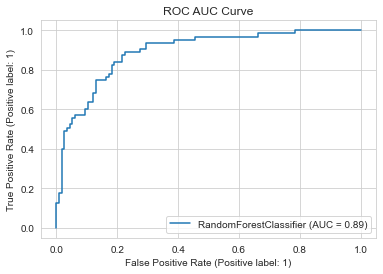

In [99]:
# ROC AUC CURVE
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC Curve')
plt.show()

In [ ]:
# Here the final accuracy is almost 79% and the AUC score is 89% which is some what good.

In [100]:
# Saving the model in the pickle format
import joblib
joblib.dump(GCV.best_estimator_,"Titanic_train.pkl")

['Titanic_train.pkl']